# 2.5 Binary Square Waves

$$
r_1(x, y) = \sum_{n=-\infty}^{\infty} a^{(1)} _n \cos(\frac {2 \pi nx}{T_1})
$$

$$
a^{(1)}_n = \frac{1}{n \pi} \sin(\frac {\pi n \tau_1 }{T_1}) = \frac{\tau_1}{T_1} sinc(\frac {n \tau_1}{T_1})
$$

The Sinc function has a max amplitude of tau / T or rather, the dwell of a square pulse divided by its Period.  

In [131]:
import numpy as np
import pandas as pd
from scipy.fft import fft2, ifft2, ifftshift, fftshift
import matplotlib.pyplot as plt
%matplotlib inline

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


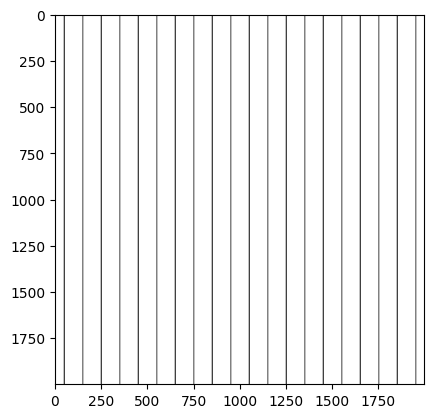

In [144]:
granularity = 0.01
x_max = 10
tau_1 = 1
T_1 = 1

x = np.arange(-x_max, x_max, granularity)
X, Y = np.meshgrid(x, x)

r1 = 0

for n in range(-x_max, x_max):
    try:
        an = (1/(n * np.pi) * np.sin((n * np.pi * tau_1) / (T_1))) 
    except:
        an = tau_1 / T_1

    r1 = r1 + an * np.cos((2 * np.pi * n * X) / T_1)

print(r1)
plt.set_cmap("gray")
plt.imshow(r1)

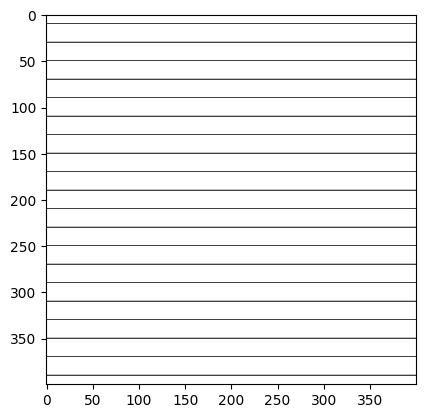

In [62]:
granularity = 0.05
x_max = 10
tau_2 = 1
T_2 = 1
theta2 = np.pi / 2

x = np.arange(-x_max, x_max, granularity)
X, Y = np.meshgrid(x, x)

r2 = 0

for n in range(-x_max, x_max):
    try:
        an = (1/(n * np.pi) * np.sin((n * np.pi * tau_2) / (T_2))) 
    except:
        an = tau_2 / T_2

    r2 = r2 + an * np.cos((2 * np.pi * n * (X * np.cos(theta2) + Y * np.sin(theta2))) / T_2)

plt.set_cmap("gray")
plt.imshow(r2)

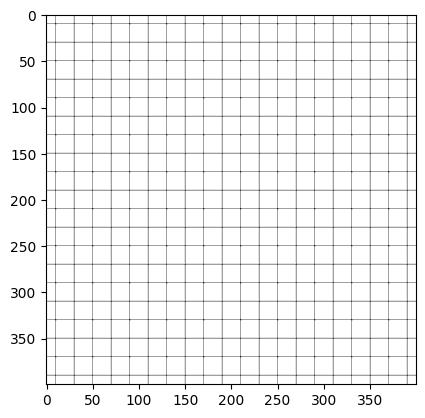

In [64]:
plt.imshow(r1 * r2)

In [89]:
def sinc_gen(opening_ratio):   
    granularity = 0.01
    x_max = 40
    # opening_ratio = 1/5  # tau / T


    x = np.arange(-x_max, x_max, granularity)
    X, Y = np.meshgrid(x, x)

    sinc = (1 / (X * np.pi * opening_ratio)) * np.sin(np.pi * X * opening_ratio) + np.sin(np.pi * Y * opening_ratio)
    return sinc

In [ ]:
for n in np.arange(1, 100):
    plt.imsave(f'sinc/{n}.jpg', arr = sinc_gen(1/5 * np.sin(2 * np.pi * n / 100)) + 1 / 5)

In [103]:
def sinc_gen2(opening_ratio):   
    granularity = 0.05
    x_max = 10
    # opening_ratio = 1/5  # tau / T


    x = np.arange(-x_max, x_max, granularity)
    X, Y = np.meshgrid(x, x)

    sinc = (1 / (X * np.pi * opening_ratio)) * np.sin(np.pi * X * opening_ratio) + (1 / (Y * np.pi * opening_ratio)) * np.sin(np.pi * Y * opening_ratio)
    return sinc

for n in np.arange(1, 100):
    plt.imsave(f'sinc2/{n}.jpg', arr = sinc_gen2(1/5 * np.sin(2 * np.pi * n / 100)) + 1 / 5)

In [142]:
def sinc_gen3(opening_ratio):   
    granularity = 0.01
    x_max = 10
    # opening_ratio = 1/5  # tau / T


    x = np.arange(-x_max, x_max, granularity)
    X, Y = np.meshgrid(x, x)

    sinc = (1 / (X * np.pi * opening_ratio)) * np.sin(np.pi * X * opening_ratio) * (1 / (Y * np.pi * opening_ratio)) * np.sin(np.pi * Y * opening_ratio)
    return sinc

for n in np.arange(1, 200):
    plt.imsave(f'sinc3/{n}.jpg', arr = sinc_gen3(opening_ratio = 3 / 8 * np.sin(2 * np.pi * n / 100) + 3/8))

C:\Users\nicor\AppData\Local\Temp\ipykernel_12068\1361061496.py:10: RuntimeWarning: divide by zero encountered in divide
  sinc = (1 / (X * np.pi * opening_ratio)) * np.sin(np.pi * X * opening_ratio) * (1 / (Y * np.pi * opening_ratio)) * np.sin(np.pi * Y * opening_ratio)
C:\Users\nicor\AppData\Local\Temp\ipykernel_12068\1361061496.py:10: RuntimeWarning: invalid value encountered in multiply
  sinc = (1 / (X * np.pi * opening_ratio)) * np.sin(np.pi * X * opening_ratio) * (1 / (Y * np.pi * opening_ratio)) * np.sin(np.pi * Y * opening_ratio)


In [143]:
import os
import cv2

img_array = []
file_array = []
base = 'C:/Users/nicor/.vscode/Digital_Audio/Fourier_Img/sinc3/'
frame_cnt = len([entry for entry in os.listdir(base) if os.path.isfile(os.path.join(base, entry))])


for i in range(1, frame_cnt):
    file_array.append(base + str(i) + '.jpg')

import numpy as np
import cv2
from cv2 import dnn
 
#--------Model file paths--------#
proto_file = 'Model\colorization_deploy_v2.prototxt'
model_file = 'Model\colorization_release_v2.caffemodel'
hull_pts = 'Model\pts_in_hull.npy'
img_path = 'images/img1.jpg'
#--------------#--------------#
 
#--------Reading the model params--------#
net = dnn.readNetFromCaffe(proto_file,model_file)
kernel = np.load(hull_pts)

img_array_c = []
for i in range(0, len(file_array)):
    img = cv2.imread(file_array[i], 1)
    scaled = img.astype("float32") / 255.0
    lab_img = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)
    #-----------------------------------#---------------------#
    
    # add the cluster centers as 1x1 convolutions to the model
    class8 = net.getLayerId("class8_ab")
    conv8 = net.getLayerId("conv8_313_rh")
    pts = kernel.transpose().reshape(2, 313, 1, 1)
    net.getLayer(class8).blobs = [pts.astype("float32")]
    net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]
    #-----------------------------------#---------------------#
    
    # we'll resize the image for the network
    resized = cv2.resize(lab_img, (224, 224))
    # split the L channel
    L = cv2.split(resized)[0]
    # mean subtraction
    L -= 50
    #-----------------------------------#---------------------#
    
    # predicting the ab channels from the input L channel
    
    net.setInput(cv2.dnn.blobFromImage(L))
    ab_channel = net.forward()[0, :, :, :].transpose((1, 2, 0))
    # resize the predicted 'ab' volume to the same dimensions as our
    # input image
    ab_channel = cv2.resize(ab_channel, (img.shape[1], img.shape[0]))
    
    
    # Take the L channel from the image
    L = cv2.split(lab_img)[0]
    # Join the L channel with predicted ab channel
    colorized = np.concatenate((L[:, :, np.newaxis], ab_channel), axis=2)
    
    # Then convert the image from Lab to BGR
    colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
    colorized = np.clip(colorized, 0, 1)
    
    # change the image to 0-255 range and convert it from float32 to int
    colorized = (255 * colorized).astype("uint8")
    
    # Let's resize the images and show them together
    img = cv2.resize(img,(640,640))
    colorized = cv2.resize(colorized,(640,640))
    
    img_array_c.append(colorized * i)
    height, width, layers = colorized.shape
    size = (width,height)

out = cv2.VideoWriter(f'sinc3.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size)

for i in range(len(img_array_c)):
    out.write(img_array_c[i])
out.release()